In [1]:
import pandas as pd
import numpy as np
import fiona
import matplotlib.pyplot as plt
import array
import folium
%matplotlib inline

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


In [2]:
import pprint
with fiona.open('VILLAGE BOUNDARY.shp') as src:
    pprint.pprint(src[0])

{'geometry': {'coordinates': [[(77.26761612, 18.451610549999998),
                               (77.27471172, 18.473339069999998),
                               (77.27493276, 18.4733505),
                               (77.27510844, 18.47336958),
                               (77.27789304, 18.47245023),
                               (77.28347772, 18.46994976),
                               (77.28713244, 18.46838952),
                               (77.28939828, 18.467620829999998),
                               (77.29178616, 18.468000449999998),
                               (77.2934418, 18.47016909),
                               (77.29528031999999, 18.47200014),
                               (77.29591355999999, 18.473819759999998),
                               (77.29765307999999, 18.47336004),
                               (77.30010216, 18.47178081),
                               (77.30201736, 18.470840489999997),
                               (77.30299368, 18.46759032)

In [3]:
import geopandas as gpd

In [4]:
gdf = gpd.read_file('VILLAGE BOUNDARY.shp')

In [5]:
gdf.head()

,KARNA_ID,NAME_11,SUB_DIST11,DISTRICT11,STATE_UT,CENSUS2011,geometry
0,1,Mukhed,Aurad,Bidar,Karnataka,2955805456599970,"POLYGON ((77.26761612 18.45161055, 77.27471172..."
1,2,Bawalgaon,Aurad,Bidar,Karnataka,2955805456599972,"POLYGON ((77.33392343999999 18.42090984, 77.33..."
2,3,Nandi Bijalgaon,Aurad,Bidar,Karnataka,2955805456599971,"POLYGON ((77.27726736 18.42519951, 77.27937299..."
3,4,Chikli Udgir,Aurad,Bidar,Karnataka,2955805456599969,"POLYGON ((77.27726736 18.42519951, 77.27745059..."
4,5,Hokrana,Aurad,Bidar,Karnataka,2955805456599973,"POLYGON ((77.32409652 18.42189984, 77.32427976..."


In [6]:
gdf

,KARNA_ID,NAME_11,SUB_DIST11,DISTRICT11,STATE_UT,CENSUS2011,geometry
0,1,Mukhed,Aurad,Bidar,Karnataka,2955805456599970,"POLYGON ((77.26761612 18.45161055, 77.27471172..."
1,2,Bawalgaon,Aurad,Bidar,Karnataka,2955805456599972,"POLYGON ((77.33392343999999 18.42090984, 77.33..."
2,3,Nandi Bijalgaon,Aurad,Bidar,Karnataka,2955805456599971,"POLYGON ((77.27726736 18.42519951, 77.27937299..."
3,4,Chikli Udgir,Aurad,Bidar,Karnataka,2955805456599969,"POLYGON ((77.27726736 18.42519951, 77.27745059..."
4,5,Hokrana,Aurad,Bidar,Karnataka,2955805456599973,"POLYGON ((77.32409652 18.42189984, 77.32427976..."
5,6,Muthkhed (Chondi Mukhed),Aurad,Bidar,Karnataka,2955805456599974,"POLYGON ((77.29393752 18.41419026, 77.2945938 ..."
6,7,Hangerga,Aurad,Bidar,Karnataka,2955805456599981,"POLYGON ((77.37676992 18.39262005, 77.37934104..."
7,8,Dabka(Chawar),Aurad,Bidar,Karnataka,2955805456599978,"POLYGON ((77.28436296 18.39715002, 77.28636168..."
8,9,Sawargaon,Aurad,Bidar,Karnataka,2955805456599980,"POLYGON ((77.35205087999999 18.39772989, 77.35..."
9,10,Aknapur,Aurad,Bidar,Karnataka,2955805456599975,"POLYGON ((77.26383971999999 18.38175966, 77.26..."


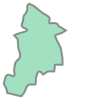

In [7]:
gdf['geometry'][10]

In [8]:
from shapely.geometry import Polygon

In [9]:
cen_points= gdf['geometry'].centroid

In [10]:
type(cen_points)

geopandas.geoseries.GeoSeries

In [11]:
print(cen_points)

0        POINT (77.28518620189236 18.46101011560289)
1        POINT (77.35896268886979 18.42177201032195)
2        POINT (77.30227896672584 18.42363933857228)
3        POINT (77.26165389523375 18.40081223598321)
4        POINT (77.33008207087087 18.40081046709531)
5        POINT (77.29990748983268 18.40243833605011)
6         POINT (77.39801772189185 18.3890385761592)
7        POINT (77.29006326347069 18.37105944888421)
8        POINT (77.35804891389046 18.38287681152622)
9        POINT (77.27368793676403 18.38914047308997)
10       POINT (77.38087611611299 18.35704440804706)
11       POINT (77.32698796896592 18.36775911207819)
12       POINT (77.25872935490322 18.36335551074503)
13       POINT (77.23704514341649 18.36026070032587)
14       POINT (77.35669432019832 18.35129175968128)
15       POINT (77.32827247022091 18.33939765602981)
16       POINT (77.29396561493395 18.32507782455624)
17       POINT (77.23215297211993 18.32222585788044)
18       POINT (77.26705013367798 18.337438169

In [12]:
from shapely.geometry import shape

 
listarray = []
for pp in cen_points:
    listarray.append([pp.x, pp.y])
nparray = np.array(listarray)
nparray

array([[77.2851862 , 18.46101012],
       [77.35896269, 18.42177201],
       [77.30227897, 18.42363934],
       ...,
       [76.68457473, 11.64739464],
       [76.70935878, 11.64908459],
       [76.6598197 , 11.63094185]])

In [13]:
cent_lat= nparray[:, -1]
cent_lat

array([18.46101012, 18.42177201, 18.42363934, ..., 11.64739464,
       11.64908459, 11.63094185])

In [14]:
cent_long=nparray[:, 0]
cent_long

array([77.2851862 , 77.35896269, 77.30227897, ..., 76.68457473,
       76.70935878, 76.6598197 ])

In [15]:
towers=pd.read_csv('towers.csv')

In [16]:
towersnew=towers[['Latitude', 'Longitude']]

In [17]:
towersnew.head()

,Latitude,Longitude
0,16.54317,74.97011
1,16.24083,74.76062
2,16.72804,75.06592
3,15.82353,74.50332
4,16.36418,74.95661


In [18]:
tlat = (towersnew['Latitude']).as_matrix()

C:\Users\rachit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [19]:
tlat

array([16.54317, 16.24083, 16.72804, 15.82353, 16.36418, 15.89233,
       16.21059, 16.25857, 15.91562, 16.64851, 16.62124, 15.88903,
       15.87378, 16.43347, 16.86426, 15.73701, 15.91435, 15.89171,
       15.87716, 15.84625, 15.85325, 15.87101, 15.83349, 15.88079,
       15.87269, 15.88264, 16.80542, 15.81271, 15.88581, 15.82446,
       15.83927, 15.89537, 16.69139, 15.89904, 16.16064, 15.96703,
       15.7834 , 15.83764, 15.93951, 15.8853 , 16.44687, 15.94187,
       15.87948, 16.2444 , 15.83676, 15.85608, 15.75349, 15.84512,
       15.85801, 15.82174, 15.81395, 15.84603, 15.69228, 16.73299,
       15.78801, 15.85903, 16.4378 , 16.01301, 16.0044 , 15.85657,
       16.70884, 15.75444, 15.88439, 15.81504, 15.81992, 15.85755,
       15.58165, 15.52704, 16.16373, 15.85979, 15.90696, 16.16779,
       15.86308, 16.15818, 15.85811, 15.87561, 15.41689, 16.72375,
       15.77744, 16.54031, 15.86102, 15.86928, 15.84133, 16.42836,
       15.83971, 15.86596, 15.85518, 15.86441, 15.88096, 16.77

In [20]:
tlong= (towersnew['Longitude']).as_matrix()

C:\Users\rachit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [21]:
import scipy
import time
from scipy import spatial

In [22]:
combined = np.vstack((tlong, tlat)).T

In [23]:
combined

array([[74.97011, 16.54317],
       [74.76062, 16.24083],
       [75.06592, 16.72804],
       [74.50332, 15.82353],
       [74.95661, 16.36418],
       [74.55669, 15.89233],
       [74.79196, 16.21059],
       [74.81247, 16.25857],
       [74.63955, 15.91562],
       [74.79631, 16.64851],
       [74.69044, 16.62124],
       [74.50558, 15.88903],
       [74.47439, 15.87378],
       [74.59174, 16.43347],
       [75.08247, 16.86426],
       [74.63129, 15.73701],
       [74.74242, 15.91435],
       [74.51148, 15.89171],
       [74.50535, 15.87716],
       [74.50955, 15.84625],
       [74.52021, 15.85325],
       [74.51218, 15.87101],
       [74.50009, 15.83349],
       [74.53301, 15.88079],
       [74.52007, 15.87269],
       [74.53989, 15.88264],
       [75.23193, 16.80542],
       [74.86034, 15.81271],
       [74.47991, 15.88581],
       [74.51443, 15.82446],
       [74.51237, 15.83927],
       [74.50279, 15.89537],
       [74.75845, 16.69139],
       [74.58372, 15.89904],
       [74.824

In [148]:
import math
R= 6371
i=0
cent_x_l=[]
cent_y_l=[]
cent_z_l=[]
for x, y in zip(cent_lat, cent_long):
    cent_x = R * math.cos(x) * math.cos(y)
    cent_x_l.insert(i, cent_x) 
    cent_x_a=np.array(cent_x_l)

   
    cent_y = R * math.cos(x) * math.sin(y)
    cent_y_l.insert(i, cent_y) 
    cent_y_a=np.array(cent_y_l)
    
    cent_z = R * math.sin(x)
    cent_z_l.insert(i, cent_z) 
    cent_z_a=np.array(cent_z_l)
    
    i=i+1
combined_a_b_c_arrays = np.dstack([cent_x_a.ravel(),cent_y_a.ravel(), cent_z_a.ravel()])[0]


In [149]:
combined_a_b_c_arrays

array([[-1833.24893715,  5603.86755904, -2413.60885713],
       [-2203.60392139,  5361.72448096, -2643.04395498],
       [-1897.91614928,  5482.60898779, -2632.21465259],
       ...,
       [ 1084.57906796,  3709.56855944, -5064.82283483],
       [  994.51346156,  3743.57381807, -5058.28419955],
       [ 1150.55262154,  3601.71250841, -5127.72236688]])

In [156]:
cen_list = list(combined_a_b_c_arrays)

In [157]:
cen_list

[array([-1833.24893715,  5603.86755904, -2413.60885713]),
 array([-2203.60392139,  5361.72448096, -2643.04395498]),
 array([-1897.91614928,  5482.60898779, -2632.21465259]),
 array([-1655.91228393,  5496.1934405 , -2763.95607283]),
 array([-2027.83628852,  5370.10350784, -2763.96622664]),
 array([-1866.35644239,  5433.08687322, -2754.61824178]),
 array([-2374.00027113,  5190.10994479, -2831.34640652]),
 array([-1784.61869486,  5366.50560505, -2933.49530508]),
 array([-2158.05882282,  5264.582954  , -2866.45939055]),
 array([-1712.1378267 ,  5444.72180197, -2830.76483685]),
 array([-2247.26319415,  5144.36554788, -3012.46614022]),
 array([-1978.11092434,  5287.8693872 , -2952.14422326]),
 array([-1609.11265065,  5397.96299856, -2976.97714867]),
 array([-1489.24591654,  5422.67335057, -2994.39498616]),
 array([-2115.63197849,  5181.06953308, -3044.71030231]),
 array([-1954.67094792,  5204.82714399, -3111.05719756]),
 array([-1760.59019903,  5226.05277608, -3190.35037773]),
 array([-1432.

In [130]:
R= 6371
i=0
t_x_l=[]
t_y_l=[]
t_z_l=[]
for x, y in zip(tlat, tlong):
   
    t_x = R * math.cos(x) * math.cos(y)
    t_x_l.insert(i, t_x) 
    t_x_a=np.array(t_x_l)
    
       
    t_y = R * math.cos(x) * math.sin(y)
    t_y_l.insert(i, t_y) 
    t_y_a=np.array(t_y_l)
    
    t_z = R * math.sin(x)
    t_z_l.insert(i, t_z) 
    t_z_a=np.array(t_z_l)
    i=i+1

combined_x_y_z_arrays = np.dstack([t_x_a.ravel(),t_y_a.ravel(), t_z_a.ravel()])[0]


In [155]:
(combined_x_y_z_arrays)

array([[-3889.27116257,  1774.82971379, -4723.68397663],
       [-4409.49206268,  3266.66526047, -3236.49792603],
       [-3151.55875119,  1087.60565716, -5429.03604448],
       ...,
       [-3794.4168901 ,  5021.44345881,  -988.50748814],
       [-2533.02056244,  4138.12032977, -4129.09287454],
       [-3986.1172634 ,  4952.10047544,   420.9644207 ]])

In [158]:
def do_kdtree(combined,cen_points):
    mytree = scipy.spatial.cKDTree(combined)
    dist, indexes = mytree.query(cen_points)
    return dist, indexes

start = time.time()
results2 = do_kdtree(combined_x_y_z_arrays,cen_list)
end = time.time()

print ('Completed in: ',end-start)
print(results2)

Completed in:  0.23144245147705078
(array([1784.76794304, 1402.12317042, 1716.34774337, ..., 3176.16941739,
       3085.5842517 , 3252.72185865]), array([180, 180, 180, ..., 119, 119, 119]))


In [28]:
y_array = np.random.random(10000).reshape(100,100)
x_array = np.random.random(10000).reshape(100,100)


In [38]:
y_array

array([[0.65385964, 0.16803012, 0.17030532, ..., 0.3865071 , 0.89796758,
        0.61313014],
       [0.50088596, 0.33638776, 0.19605033, ..., 0.33949633, 0.20053826,
        0.0505781 ],
       [0.41005689, 0.00452744, 0.26819697, ..., 0.10350975, 0.86924767,
        0.53528201],
       ...,
       [0.44509054, 0.26562607, 0.88471318, ..., 0.8535546 , 0.15145324,
        0.69330501],
       [0.2181666 , 0.3649959 , 0.78111834, ..., 0.04097247, 0.97554645,
        0.67786658],
       [0.73977181, 0.12881819, 0.23055955, ..., 0.41222102, 0.49606205,
        0.87944573]])

In [133]:
combined_x_y_arrays = np.dstack([y_array.ravel(),x_array.ravel()])[0]
print(combined_x_y_arrays)

[[0.65385964 0.94036925]
 [0.16803012 0.06014322]
 [0.17030532 0.57179699]
 ...
 [0.41222102 0.36752599]
 [0.49606205 0.47863632]
 [0.87944573 0.84661484]]


In [41]:
len(combined_x_y_arrays[0])

2

In [29]:
type(y_array)

numpy.ndarray

In [31]:
points = np.random.random(10000).reshape(2,5000)


In [137]:
points

array([[0.37553435, 0.90663528, 0.82395836, ..., 0.27631861, 0.05453355,
        0.38627711],
       [0.46688703, 0.82253878, 0.98804697, ..., 0.80453833, 0.31371714,
        0.06126611]])

In [33]:
points_list = list(points.transpose())

In [154]:
points_list

[array([0.37553435, 0.46688703]),
 array([0.90663528, 0.82253878]),
 array([0.82395836, 0.98804697]),
 array([0.61640332, 0.22043314]),
 array([0.68951786, 0.00168972]),
 array([0.4116048 , 0.22865912]),
 array([0.81471641, 0.66267492]),
 array([0.72753036, 0.15757837]),
 array([0.5878806 , 0.19707368]),
 array([0.57418643, 0.60014091]),
 array([0.81872583, 0.29476902]),
 array([0.76851764, 0.50957912]),
 array([0.31032075, 0.04031844]),
 array([0.14565058, 0.80540991]),
 array([0.93627834, 0.82359857]),
 array([0.77385375, 0.45806114]),
 array([0.82491417, 0.80655907]),
 array([0.0742303 , 0.63236176]),
 array([0.12653789, 0.45027857]),
 array([0.65895002, 0.70470298]),
 array([0.04986926, 0.12912309]),
 array([0.93475642, 0.64053148]),
 array([0.24987133, 0.74165559]),
 array([0.80878207, 0.95619722]),
 array([0.28352566, 0.75367596]),
 array([0.53049275, 0.85343711]),
 array([0.12279264, 0.69432827]),
 array([0.65492895, 0.48226124]),
 array([0.32304822, 0.26940996]),
 array([0.5664

In [35]:
type(points_list)

list